**DATA COLLECTION**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('hungarian_ds.csv')

# Replace '?' with NaN for easier handling of missing values
df.replace('?', np.nan, inplace=True)


**CHECKING FOR MISSING VALUE**

In [ ]:
#To check any feature has missing values or not!!
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          291
thal        266
target        0
dtype: int64

**DATA PRE-PROCESSING / DATA CLEANING**

In [ ]:
# Replace '?' with NaN for easier handling of missing values
df.replace('?', np.nan, inplace=True)

# Handle missing values (NaN)
# Mean imputation for numeric columns in this example
imputer = SimpleImputer(strategy='mean')
df[['trestbps', 'chol', 'ca', 'thalach']] = imputer.fit_transform(df[['trestbps', 'chol', 'ca', 'thalach']])


label_encoder = LabelEncoder()
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Split the data into features and target
X = df.drop('target', axis=1)
y = df['target']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)



**IMPORTING MODULES SECTION**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score
import statistics

**K-NEAREST NEIGHBOR**

In [ ]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
m1 = 'knn classifier'
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    knn = KNeighborsClassifier(n_neighbors=9)
    knn.fit(X_train_fold, y_train_fold)
    knnpred = knn.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, knnpred)
    fold_accuracy = accuracy_score(y_test_fold, knnpred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

knnaccuracy = total_accuracy / k
print("Mean Accuracy =", knnaccuracy)

Accuracy for this fold: 66.66666666666666
Confusion Matrix for Fold:
[[16  4]
 [ 6  4]]
Accuracy for this fold: 53.333333333333336
Confusion Matrix for Fold:
[[12  7]
 [ 7  4]]
Accuracy for this fold: 73.33333333333333
Confusion Matrix for Fold:
[[19  4]
 [ 4  3]]
Accuracy for this fold: 56.666666666666664
Confusion Matrix for Fold:
[[15  4]
 [ 9  2]]
Accuracy for this fold: 55.172413793103445
Confusion Matrix for Fold:
[[12  7]
 [ 6  4]]
Accuracy for this fold: 58.620689655172406
Confusion Matrix for Fold:
[[14  4]
 [ 8  3]]
Accuracy for this fold: 72.41379310344827
Confusion Matrix for Fold:
[[16  1]
 [ 7  5]]
Accuracy for this fold: 41.37931034482759
Confusion Matrix for Fold:
[[10  3]
 [14  2]]
Accuracy for this fold: 82.75862068965517
Confusion Matrix for Fold:
[[19  2]
 [ 3  5]]
Accuracy for this fold: 72.41379310344827
Confusion Matrix for Fold:
[[17  2]
 [ 6  4]]
Mean Accuracy = 63.2758620689655


**LOGISTIC REGRESSION**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
m2 = 'lr classifier'
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=23)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    lr =LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)

    lr.fit(X_train_fold,y_train_fold)
    lrpred = lr.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, lrpred)
    fold_accuracy = accuracy_score(y_test_fold, lrpred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

lraccuracy = total_accuracy / k
print("Mean Accuracy =", lraccuracy)

Accuracy for this fold: 73.33333333333333
Confusion Matrix for Fold:
[[12  2]
 [ 6 10]]
Accuracy for this fold: 90.0
Confusion Matrix for Fold:
[[19  2]
 [ 1  8]]
Accuracy for this fold: 90.0
Confusion Matrix for Fold:
[[22  1]
 [ 2  5]]
Accuracy for this fold: 70.0
Confusion Matrix for Fold:
[[18  5]
 [ 4  3]]
Accuracy for this fold: 86.20689655172413
Confusion Matrix for Fold:
[[17  2]
 [ 2  8]]
Accuracy for this fold: 79.3103448275862
Confusion Matrix for Fold:
[[ 9  3]
 [ 3 14]]
Accuracy for this fold: 89.65517241379311
Confusion Matrix for Fold:
[[20  0]
 [ 3  6]]
Accuracy for this fold: 79.3103448275862
Confusion Matrix for Fold:
[[15  1]
 [ 5  8]]
Accuracy for this fold: 75.86206896551724
Confusion Matrix for Fold:
[[18  2]
 [ 5  4]]
Accuracy for this fold: 86.20689655172413
Confusion Matrix for Fold:
[[18  2]
 [ 2  7]]
Mean Accuracy = 81.98850574712642


**SVM Classifier**

In [ ]:
#SVM
m3 = 'svm classifier'
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=23)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    Svm = SVC(kernel = 'linear',C=2,probability=True)
    Svm.fit(X_train_fold,y_train_fold)
    Svmpred = Svm.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, Svmpred)
    fold_accuracy = accuracy_score(y_test_fold, Svmpred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

svmaccuracy = total_accuracy / k
print("Mean Accuracy =", svmaccuracy)

Accuracy for this fold: 66.66666666666666
Confusion Matrix for Fold:
[[11  3]
 [ 7  9]]
Accuracy for this fold: 86.66666666666667
Confusion Matrix for Fold:
[[19  2]
 [ 2  7]]
Accuracy for this fold: 93.33333333333333
Confusion Matrix for Fold:
[[23  0]
 [ 2  5]]
Accuracy for this fold: 73.33333333333333
Confusion Matrix for Fold:
[[18  5]
 [ 3  4]]
Accuracy for this fold: 86.20689655172413
Confusion Matrix for Fold:
[[18  1]
 [ 3  7]]
Accuracy for this fold: 82.75862068965517
Confusion Matrix for Fold:
[[10  2]
 [ 3 14]]
Accuracy for this fold: 93.10344827586206
Confusion Matrix for Fold:
[[20  0]
 [ 2  7]]
Accuracy for this fold: 82.75862068965517
Confusion Matrix for Fold:
[[16  0]
 [ 5  8]]
Accuracy for this fold: 72.41379310344827
Confusion Matrix for Fold:
[[17  3]
 [ 5  4]]
Accuracy for this fold: 86.20689655172413
Confusion Matrix for Fold:
[[19  1]
 [ 3  6]]
Mean Accuracy = 82.34482758620689


**DECISION TREE**

In [ ]:
#DT
m4 = 'decision tree'
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=23)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    dt = DecisionTreeClassifier(criterion='entropy',random_state = 0,max_depth=6)
    dt.fit(X_train_fold,y_train_fold)
    dtpred = dt.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, dtpred)
    fold_accuracy = accuracy_score(y_test_fold, dtpred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

dtaccuracy = total_accuracy / k
print("Mean Accuracy =", dtaccuracy)

Accuracy for this fold: 76.66666666666667
Confusion Matrix for Fold:
[[11  3]
 [ 4 12]]
Accuracy for this fold: 83.33333333333334
Confusion Matrix for Fold:
[[19  2]
 [ 3  6]]
Accuracy for this fold: 86.66666666666667
Confusion Matrix for Fold:
[[21  2]
 [ 2  5]]
Accuracy for this fold: 66.66666666666666
Confusion Matrix for Fold:
[[17  6]
 [ 4  3]]
Accuracy for this fold: 89.65517241379311
Confusion Matrix for Fold:
[[18  1]
 [ 2  8]]
Accuracy for this fold: 65.51724137931035
Confusion Matrix for Fold:
[[ 8  4]
 [ 6 11]]
Accuracy for this fold: 93.10344827586206
Confusion Matrix for Fold:
[[20  0]
 [ 2  7]]
Accuracy for this fold: 68.96551724137932
Confusion Matrix for Fold:
[[14  2]
 [ 7  6]]
Accuracy for this fold: 68.96551724137932
Confusion Matrix for Fold:
[[15  5]
 [ 4  5]]
Accuracy for this fold: 82.75862068965517
Confusion Matrix for Fold:
[[18  2]
 [ 3  6]]
Mean Accuracy = 78.22988505747128


**GAUSSIAN NB**

In [ ]:
#GaussianNB

m5 = 'gaussian nb'
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=23)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    nb = GaussianNB()
    nb.fit(X_train_fold,y_train_fold)
    nbpred = nb.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, nbpred)
    fold_accuracy = accuracy_score(y_test_fold, nbpred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

nbaccuracy = total_accuracy / k
print("Mean Accuracy =", nbaccuracy)

Accuracy for this fold: 70.0
Confusion Matrix for Fold:
[[10  4]
 [ 5 11]]
Accuracy for this fold: 86.66666666666667
Confusion Matrix for Fold:
[[18  3]
 [ 1  8]]
Accuracy for this fold: 93.33333333333333
Confusion Matrix for Fold:
[[22  1]
 [ 1  6]]
Accuracy for this fold: 70.0
Confusion Matrix for Fold:
[[16  7]
 [ 2  5]]
Accuracy for this fold: 86.20689655172413
Confusion Matrix for Fold:
[[17  2]
 [ 2  8]]
Accuracy for this fold: 82.75862068965517
Confusion Matrix for Fold:
[[ 9  3]
 [ 2 15]]
Accuracy for this fold: 93.10344827586206
Confusion Matrix for Fold:
[[20  0]
 [ 2  7]]
Accuracy for this fold: 82.75862068965517
Confusion Matrix for Fold:
[[15  1]
 [ 4  9]]
Accuracy for this fold: 72.41379310344827
Confusion Matrix for Fold:
[[16  4]
 [ 4  5]]
Accuracy for this fold: 82.75862068965517
Confusion Matrix for Fold:
[[17  3]
 [ 2  7]]
Mean Accuracy = 82.0


**QDA**

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
m6 = 'qda classifier'
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=23)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train_fold, y_train_fold)
    qdapred = qda.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, qdapred)
    fold_accuracy = accuracy_score(y_test_fold, qdapred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

qdaaccuracy = total_accuracy / k
print("Mean Accuracy =", qdaaccuracy)


Accuracy for this fold: 46.666666666666664
Confusion Matrix for Fold:
[[14  0]
 [16  0]]
Accuracy for this fold: 70.0
Confusion Matrix for Fold:
[[21  0]
 [ 9  0]]
Accuracy for this fold: 76.66666666666667
Confusion Matrix for Fold:
[[23  0]
 [ 7  0]]
Accuracy for this fold: 76.66666666666667
Confusion Matrix for Fold:
[[23  0]
 [ 7  0]]
Accuracy for this fold: 65.51724137931035
Confusion Matrix for Fold:
[[19  0]
 [10  0]]
Accuracy for this fold: 41.37931034482759
Confusion Matrix for Fold:
[[12  0]
 [17  0]]
Accuracy for this fold: 68.96551724137932
Confusion Matrix for Fold:
[[20  0]
 [ 9  0]]
Accuracy for this fold: 55.172413793103445
Confusion Matrix for Fold:
[[16  0]
 [13  0]]
Accuracy for this fold: 68.96551724137932
Confusion Matrix for Fold:
[[20  0]
 [ 9  0]]
Accuracy for this fold: 68.96551724137932
Confusion Matrix for Fold:
[[20  0]
 [ 9  0]]
Mean Accuracy = 63.89655172413793


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:951: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:951: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:954: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:951: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** 

**ENSEMBLING - BAGGING - RANDOM FOREST**

In [ ]:

from sklearn.ensemble import RandomForestClassifier
m7 = 'rf classifier'
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=23)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    rf = RandomForestClassifier(n_estimators=5, random_state=2,max_depth=5)
    rf.fit(X_train_fold, y_train_fold)
    rfpred = rf.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, rfpred)
    fold_accuracy = accuracy_score(y_test_fold, rfpred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

rfaccuracy = total_accuracy / k
print("Mean Accuracy =", rfaccuracy)

Accuracy for this fold: 80.0
Confusion Matrix for Fold:
[[11  3]
 [ 3 13]]
Accuracy for this fold: 80.0
Confusion Matrix for Fold:
[[19  2]
 [ 4  5]]
Accuracy for this fold: 80.0
Confusion Matrix for Fold:
[[19  4]
 [ 2  5]]
Accuracy for this fold: 66.66666666666666
Confusion Matrix for Fold:
[[17  6]
 [ 4  3]]
Accuracy for this fold: 89.65517241379311
Confusion Matrix for Fold:
[[18  1]
 [ 2  8]]
Accuracy for this fold: 86.20689655172413
Confusion Matrix for Fold:
[[10  2]
 [ 2 15]]
Accuracy for this fold: 86.20689655172413
Confusion Matrix for Fold:
[[20  0]
 [ 4  5]]
Accuracy for this fold: 82.75862068965517
Confusion Matrix for Fold:
[[16  0]
 [ 5  8]]
Accuracy for this fold: 65.51724137931035
Confusion Matrix for Fold:
[[15  5]
 [ 5  4]]
Accuracy for this fold: 86.20689655172413
Confusion Matrix for Fold:
[[19  1]
 [ 3  6]]
Mean Accuracy = 80.32183908045977


**ADABOOST - ENSEMBLING - BOOSTING**

In [ ]:
m8 = 'adaboost classifier'
from sklearn.ensemble import AdaBoostClassifier
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=23)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    base_classifier = DecisionTreeClassifier(max_depth=6)
    adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=20, random_state=23)
    adaboost_classifier.fit(X_train_fold, y_train_fold)
    boostpred = adaboost_classifier.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, boostpred)
    fold_accuracy = accuracy_score(y_test_fold, boostpred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

boostaccuracy = total_accuracy / k
print("Mean Accuracy =", boostaccuracy)

Accuracy for this fold: 66.66666666666666
Confusion Matrix for Fold:
[[ 9  5]
 [ 5 11]]
Accuracy for this fold: 83.33333333333334
Confusion Matrix for Fold:
[[18  3]
 [ 2  7]]
Accuracy for this fold: 86.66666666666667
Confusion Matrix for Fold:
[[21  2]
 [ 2  5]]
Accuracy for this fold: 63.33333333333333
Confusion Matrix for Fold:
[[17  6]
 [ 5  2]]
Accuracy for this fold: 93.10344827586206
Confusion Matrix for Fold:
[[18  1]
 [ 1  9]]
Accuracy for this fold: 79.3103448275862
Confusion Matrix for Fold:
[[ 9  3]
 [ 3 14]]
Accuracy for this fold: 89.65517241379311
Confusion Matrix for Fold:
[[19  1]
 [ 2  7]]
Accuracy for this fold: 79.3103448275862
Confusion Matrix for Fold:
[[15  1]
 [ 5  8]]
Accuracy for this fold: 65.51724137931035
Confusion Matrix for Fold:
[[15  5]
 [ 5  4]]
Accuracy for this fold: 79.3103448275862
Confusion Matrix for Fold:
[[16  4]
 [ 2  7]]
Mean Accuracy = 78.62068965517241


In [ ]:
pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.3/612.3 kB 8.6 MB/s eta 0:00:00


**PROPOSED DEEP LEARNING MODEL**

In [ ]:
#Deep Learning Model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


input_layer = Input(shape=(X_train.shape[1],))
d1 = Dense(units=100, activation='relu')(input_layer)
d2 = Dense(units=100, activation='relu')(d1)
d3 = Dense(units=100, activation='relu')(d2)
d4 = Dense(units=100, activation='relu')(d3)
d5 = Dense(units=100, activation='relu')(d4)
d6 = Dense(units=100, activation='relu')(d5)
d7 = Dense(units=100, activation='relu')(d6)
d8 = Dense(units=100, activation='relu')(d7)
d9 = Dense(units=100, activation='relu')(d8)
output_layer = Dense(units=1, activation='sigmoid')(d9)

deepmodel = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with metrics and optimizer
deepmodel.compile(
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Recall(name="Sensitivity"),
             tf.keras.metrics.SpecificityAtSensitivity(0.5, name="Specificity"),
             tfa.metrics.F1Score(num_classes=1, threshold=0.5)],
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001)
)

# Train the model
deepmodel.fit(x=X_train, y=y_train, batch_size=2, epochs=120)

test_loss, test_accuracy, sensitivity, specificity, f1_score = deepmodel.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity (Precision): {specificity:.2f}")
print("f1Score=" + str(list(map('{:.2f}%'.format,f1_score))))



/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Epoch 1/120
118/118 [==============================] - 4s 5ms/step - loss: 0.6912 - accuracy: 0.6085 - Sensitivity: 0.1765 - Specificity: 0.4133 - f1_score: 0.2459
Epoch 2/120
118/118 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.6298 - Sensitivity: 0.0471 - Specificity: 0.4533 - f1_score: 0.0842
Epoch 3/120
118/118 [==============================] - 0s 3ms/step - loss: 0.6828 - accuracy: 0.6426 - Sensitivity: 0.0118 - Specificity: 0.8133 - f1_score: 0.0233
Epoch 4/120
118/118 [==============================] - 0s 4ms/step - loss: 0.6773 - accuracy: 0.6426 - Sensitivity: 0.0118 - Specificity: 0.8200 - f1_score: 0.0233
Epoch 5/120
118/118 [==============================] - 0s 3ms/step - loss: 0.6699 - accuracy: 0.6426 - Sensitivity: 0.0118 - Specificity: 0.8533 - f1_score: 0.0233
Epoch 6/120
118/118 [==============================] - 0s 3ms/step - loss: 0.6598 - accuracy: 0.6426 - Sensitivity: 0.0118 - Specificity: 0.9733 - f1_score: 0.0233
Epoch 7/120
118/

In [ ]:
model_names = ['Logistic Regression', 'Naive Bayes', 'Random Forest','adaboost classifier', 'K-Nearest Neighbour', 'Decision Tree', 'Support Vector Machine','Deep Learning Model ']
accuracy_scores = [lraccuracy,nbaccuracy,rfaccuracy,boostaccuracy,knnaccuracy,dtaccuracy,svmaccuracy,test_accuracy*100]
model_ev = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores})
model_ev

,Model,Accuracy
0,Logistic Regression,81.988506
1,Naive Bayes,82.000000
2,Random Forest,80.321839
3,adaboost classifier,78.620690
4,K-Nearest Neighbour,63.275862
5,Decision Tree,78.229885
6,Support Vector Machine,82.344828
7,Deep Learning Model,77.966100


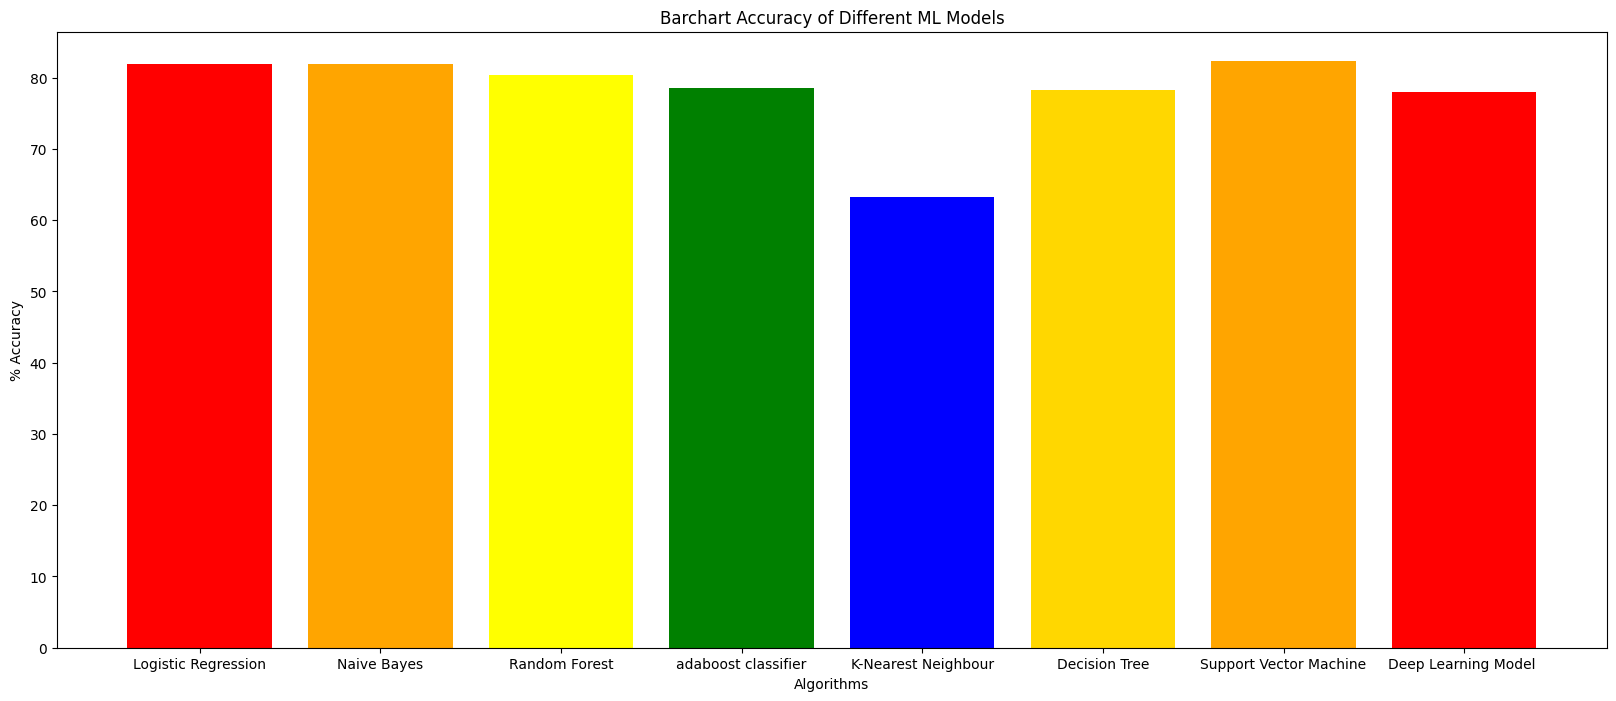

In [ ]:
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'gold', 'orange', ]
plt.figure(figsize=(20,8))
plt.title("Barchart Accuracy of Different ML Models")
plt.xlabel("Algorithms")
plt.ylabel("% Accuracy")
plt.bar(model_ev ['Model'], model_ev['Accuracy'], color = colors)
plt.show()